# 신용카드_이상거래_예측분석
- https://www.kaggle.com/datasets/youssefismail20/fraudsynth-credit-fraud-detection-dataset

---

### 데이터 분석 과정
0. 필요한 라이브러리 불러오기
1. 데이터 선택 및 로딩
2. 결측값, 이상값 탐지
3. EDA(탐색적 데이터 분석)
4. 피처 엔지니어링(feature engineering)
5. 홀드아웃(훈련데이터, 테스트 데이터로 분리)
6. 분석에 맞는 알고리즘 불러와서 모델 생성
7. 분석 목적에 맞는 지표를 이용해 모델 성능 검증
8. 하이퍼파라미터 튜닝(클래스 불균형 해소(모델에서 소수 클래스 가중치 조절/데이터 증폭 및 축소) 및 최종 모델 선택

## 필요한 라이브러리 불러오기

In [1]:
# !pip install koreanize-matplotlib --upgrade pip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

## 데이터 불러오기 및 확인
------
### 컬럼 확인
- timestamp : 거래일자
- user_id : 고객ID
- amount : 총거래금액
- location : 거래발생위치(도시)
- device_type : 거래발생기기
- is_fraud : 이상거래여부
- age : 고객나이
- income : 고객수입
- debt : 고객추정빚
- credit_score : 고객신용점수

In [3]:
data = pd.read_csv('./data/fraud_detection_dataset.csv')
data.head(2)

,timestamp,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score
0,2023-12-15 02:48:24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,998.99,Grantfurt,Mobile,0,56,42524.98,8394.05,655
1,2023-10-30 11:08:37,3675ed98-6863-4bae-b089-6f0db2df006b,241.39,Kimberlychester,Tablet,0,52,69884.04,28434.06,395


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     object 
 1   user_id       object 
 2   amount        float64
 3   location      object 
 4   device_type   object 
 5   is_fraud      int64  
 6   age           int64  
 7   income        float64
 8   debt          float64
 9   credit_score  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 152.6+ MB


In [5]:
data.describe()

,amount,is_fraud,age,income,debt,credit_score
count,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00,2000000.00
mean,1751.68,0.50,44.00,85020.99,24984.04,574.79
std,1504.16,0.50,15.30,37532.01,14440.05,159.12
min,10.00,0.00,18.00,20000.09,0.04,300.00
25%,504.34,0.00,31.00,52530.58,12465.51,437.00
50%,1000.00,0.50,44.00,85032.87,24980.93,575.00
75%,2996.71,1.00,57.00,117537.45,37480.29,713.00
max,4999.99,1.00,70.00,149999.96,49999.98,850.00


## 결측값, 이상값 탐지
- 결측치 확인/처리 및 중복값 처리

In [6]:
data.isna().sum()

timestamp       0
user_id         0
amount          0
location        0
device_type     0
is_fraud        0
age             0
income          0
debt            0
credit_score    0
dtype: int64

In [7]:
# 중복값 확인
len(data[data.duplicated()])

0

### 이상치 탐지 및 처리
- 이상치는 없는 것으로 확인

In [8]:
data_num = data.select_dtypes(exclude='object')
data_num.columns

Index(['amount', 'is_fraud', 'age', 'income', 'debt', 'credit_score'], dtype='object')

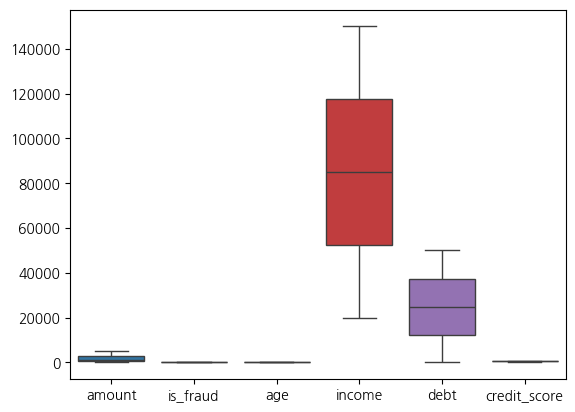

In [9]:
# 박스 플롯 확인
# 이상치가 없음을 확인
sns.boxplot(data_num)
plt.show()

============================== amount ==============================
count   2000000.00
mean       1751.68
std        1504.16
min          10.00
25%         504.34
50%        1000.00
75%        2996.71
max        4999.99
Name: amount, dtype: float64



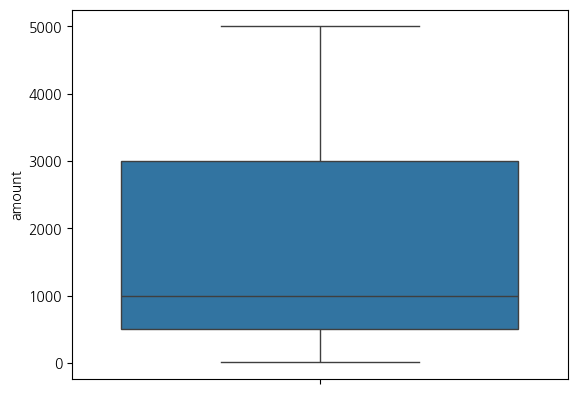


============================== is_fraud ==============================
count   2000000.00
mean          0.50
std           0.50
min           0.00
25%           0.00
50%           0.50
75%           1.00
max           1.00
Name: is_fraud, dtype: float64



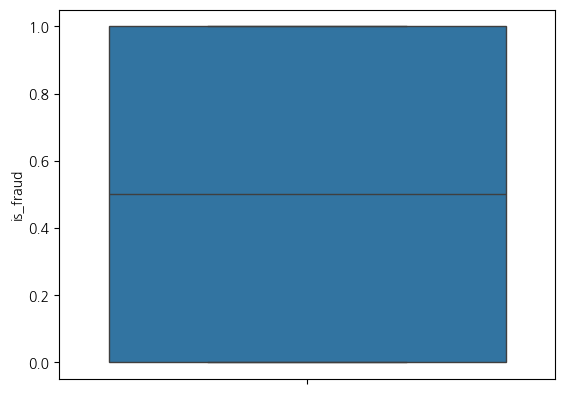


============================== age ==============================
count   2000000.00
mean         44.00
std          15.30
min          18.00
25%          31.00
50%          44.00
75%          57.00
max          70.00
Name: age, dtype: float64



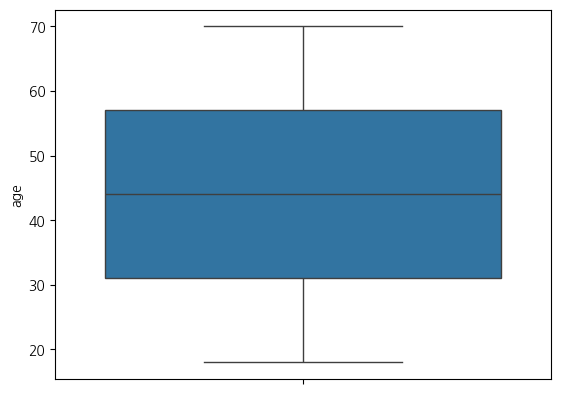


============================== income ==============================
count   2000000.00
mean      85020.99
std       37532.01
min       20000.09
25%       52530.58
50%       85032.87
75%      117537.45
max      149999.96
Name: income, dtype: float64



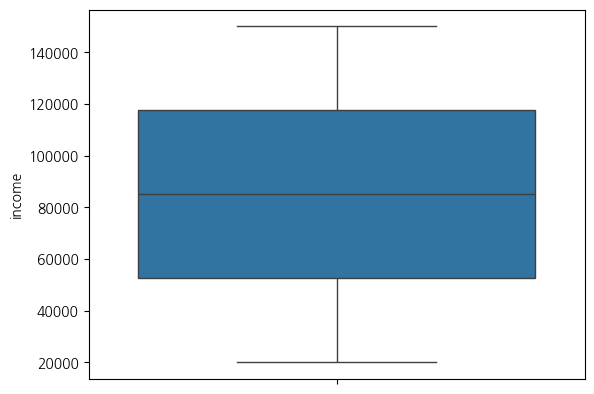


============================== debt ==============================
count   2000000.00
mean      24984.04
std       14440.05
min           0.04
25%       12465.51
50%       24980.93
75%       37480.29
max       49999.98
Name: debt, dtype: float64



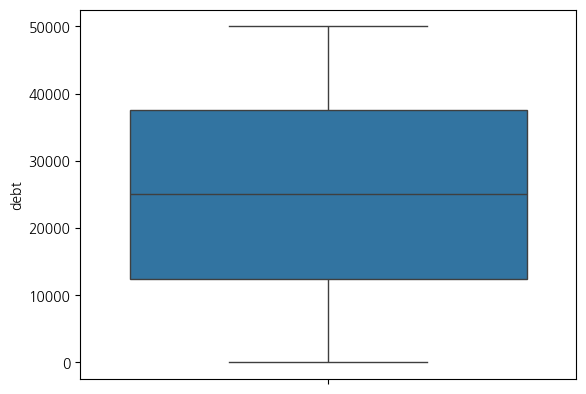


============================== credit_score ==============================
count   2000000.00
mean        574.79
std         159.12
min         300.00
25%         437.00
50%         575.00
75%         713.00
max         850.00
Name: credit_score, dtype: float64



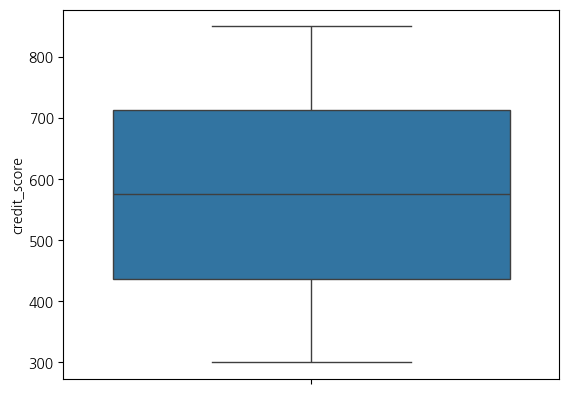

In [10]:
# 박스 플롯 확인
# 각 컬럼별로 확인
# 이상치는 없는 것으로 확인

for col in data_num:
    print('='*30, col, '='*30)
    print(data_num[col].describe())
    
    print()
    sns.boxplot(data_num[col])
    plt.show()
    print()
    

## EDA(탐색적 데이터 분석)

In [11]:
# 종속변수(is_fraud)의 데이터 비율 확인
print(data['is_fraud'].value_counts())

# 이상거래로 판단되는 경우(is_fraud == 1) 전체 데이터셋 중 비율 확인
# print('이상거래(1)인 경우의 비율 =', len(data[data['is_fraud'] == 1]) / len(data) * 100)

# 클래스 불균형 비율 확인
# 클래스 불균형은 없음
data['is_fraud'].value_counts(normalize=True)

is_fraud
0    1000000
1    1000000
Name: count, dtype: int64


is_fraud
0   0.50
1   0.50
Name: proportion, dtype: float64

In [12]:
data['timestamp'].describe()

count                 2000000
unique                1937890
top       2023-08-27 19:23:20
freq                        4
Name: timestamp, dtype: object

In [13]:
# 범주형
obj_cols = data.select_dtypes(include='object')

# 고객ID는 독립적인 값(200만개)이므로 user_id 컬럼 제외
# 거의 독립적인 값(193만개 이상)이므로 timestamp 컬럼 제외
obj_cols = obj_cols.drop(['user_id', 'timestamp'], axis=1)
print('범주형 데이터 컬럼명 :', obj_cols.columns)

# 숫자형
# 의미 없는 것 제거 : 종속변수인 is_fraud도 제거
num_cols = data.select_dtypes(exclude=['object', 'category'])
num_cols = num_cols.drop(['is_fraud'], axis=1)
print('숫자형 데이터 컬럼명 :', num_cols.columns)


범주형 데이터 컬럼명 : Index(['location', 'device_type'], dtype='object')
숫자형 데이터 컬럼명 : Index(['amount', 'age', 'income', 'debt', 'credit_score'], dtype='object')


======================================== amount ========================================
count   2000000.00
mean       1751.68
std        1504.16
min          10.00
25%         504.34
50%        1000.00
75%        2996.71
max        4999.99
Name: amount, dtype: float64


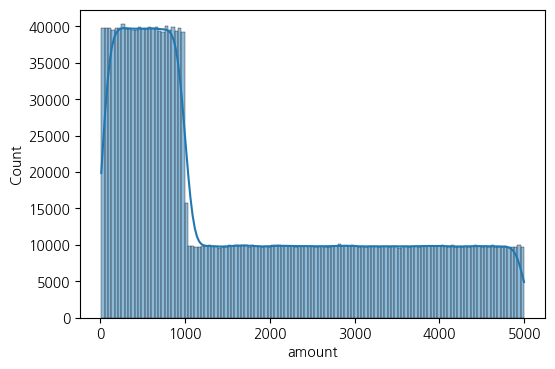

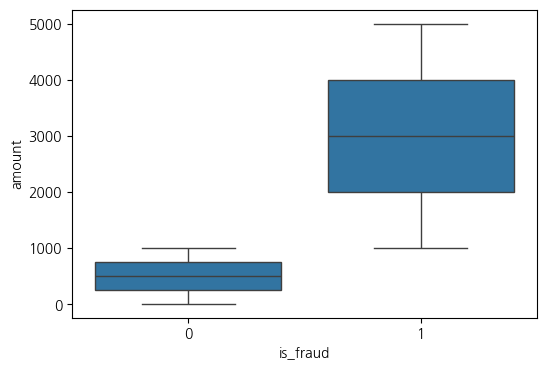

amount
4999.99   1.00
4999.98   1.00
4999.97   1.00
4999.96   1.00
4999.94   1.00
          ... 
10.31     0.00
10.32     0.00
10.33     0.00
10.34     0.00
10.35     0.00
Name: is_fraud, Length: 466189, dtype: float64



======================================== age ========================================
count   2000000.00
mean         44.00
std          15.30
min          18.00
25%          31.00
50%          44.00
75%          57.00
max          70.00
Name: age, dtype: float64


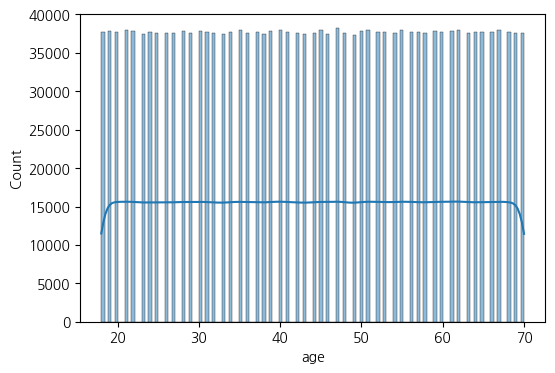

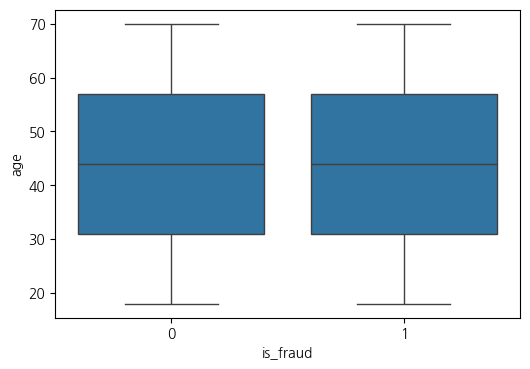

age
35   0.50
21   0.50
33   0.50
42   0.50
24   0.50
19   0.50
66   0.50
62   0.50
31   0.50
55   0.50
32   0.50
26   0.50
39   0.50
37   0.50
70   0.50
59   0.50
38   0.50
30   0.50
69   0.50
60   0.50
36   0.50
54   0.50
52   0.50
29   0.50
20   0.50
67   0.50
46   0.50
40   0.50
47   0.50
48   0.50
22   0.50
51   0.50
57   0.50
53   0.50
34   0.50
64   0.50
41   0.50
23   0.50
28   0.50
49   0.50
50   0.50
68   0.50
25   0.50
18   0.50
65   0.50
61   0.50
63   0.50
56   0.50
45   0.50
44   0.50
27   0.50
58   0.50
43   0.49
Name: is_fraud, dtype: float64



======================================== income ========================================
count   2000000.00
mean      85020.99
std       37532.01
min       20000.09
25%       52530.58
50%       85032.87
75%      117537.45
max      149999.96
Name: income, dtype: float64


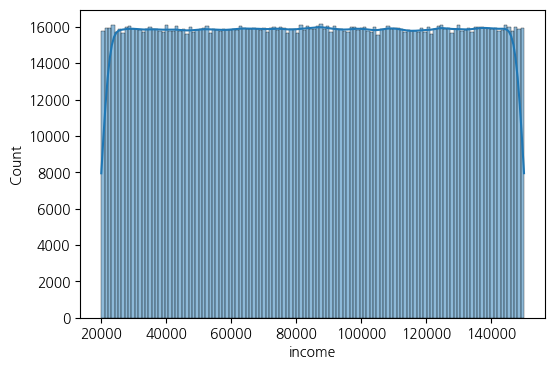

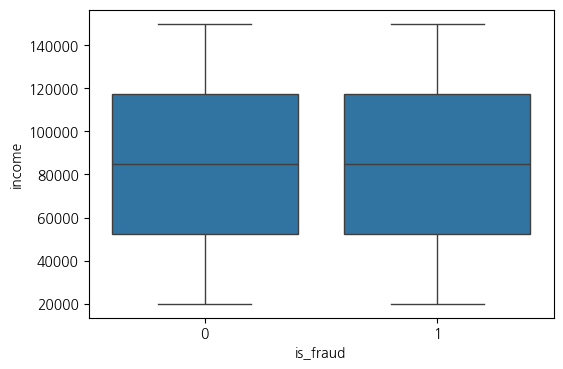

income
20000.80    1.00
149999.94   1.00
149997.15   1.00
149997.27   1.00
149997.34   1.00
            ... 
20003.27    0.00
20003.64    0.00
20003.74    0.00
20003.77    0.00
20001.78    0.00
Name: is_fraud, Length: 1854147, dtype: float64



======================================== debt ========================================
count   2000000.00
mean      24984.04
std       14440.05
min           0.04
25%       12465.51
50%       24980.93
75%       37480.29
max       49999.98
Name: debt, dtype: float64


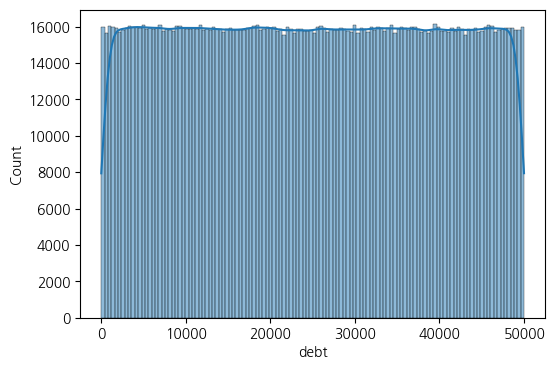

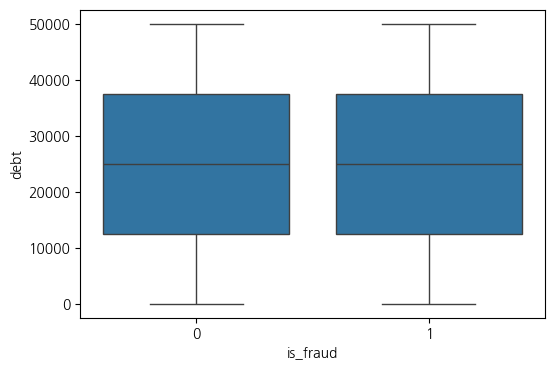

debt
0.69       1.00
49999.98   1.00
0.04       1.00
49999.97   1.00
49999.90   1.00
           ... 
1.90       0.00
2.17       0.00
2.18       0.00
2.32       0.00
2.42       0.00
Name: is_fraud, Length: 1649272, dtype: float64



======================================== credit_score ========================================
count   2000000.00
mean        574.79
std         159.12
min         300.00
25%         437.00
50%         575.00
75%         713.00
max         850.00
Name: credit_score, dtype: float64


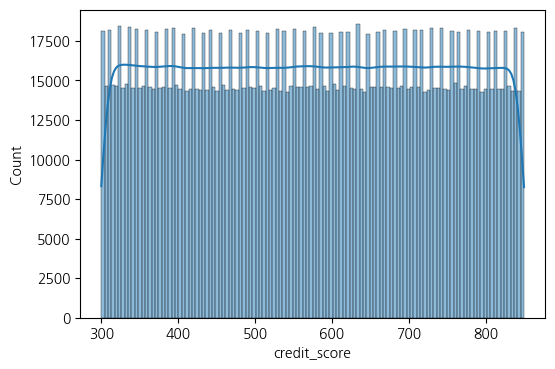

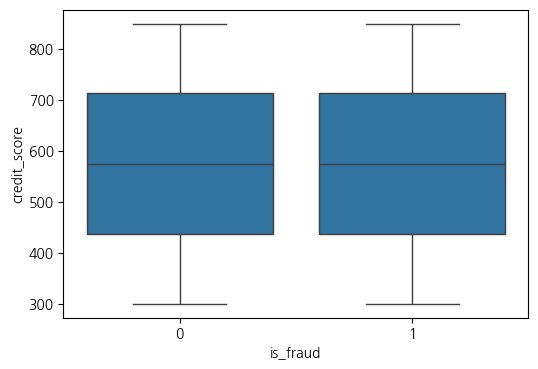

credit_score
518   0.53
446   0.52
386   0.52
398   0.52
755   0.52
      ... 
822   0.48
799   0.48
315   0.48
532   0.47
704   0.47
Name: is_fraud, Length: 551, dtype: float64





In [14]:
# 수치형 컬럼 분석

important_cols = []
for col in num_cols:
    print('='*40, col, '='*40)
    
    # 각 수치형 컬럼의 기초 통계량 확인
    print(data[col].describe())
    
    # 전체 데이터 분포 -> 히스토그램 확인
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.show()
    
    # is_fraud 그룹별 분포 -> 박스 플롯 확인
    plt.figure(figsize=(6,4))
    sns.boxplot(x='is_fraud', y=col, data=data)
    plt.show()
    
    # 그룹별 평균값 확인
    print(data.groupby(col)['is_fraud'].mean().sort_values(ascending=False))
    result = data.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    if (result >= 0.4).any():
        important_cols.append(col)
        print('\n\n')



In [15]:
# 수치형 컬럼 확인
print(num_cols.columns, end='\n\n')

# 유의미하다고 판단되는 컬럼 확인
# 다 유의미한 컬럼이라고 판단됨
print(important_cols)


Index(['amount', 'age', 'income', 'debt', 'credit_score'], dtype='object')

['amount', 'age', 'income', 'debt', 'credit_score']


In [16]:
# 범주형 컬럼 분석

for col in obj_cols:
    print('='*40, col, '='*40, end='\n\n')
    print(f"{col}의 unique값의 수 = {data[col].nunique()}", end='\n\n')
    
    print(f'{col}의 상대적 빈도 확인_value_counts 기반')
    print(data[col].value_counts(normalize=True), end='\n\n')
    
    print(f"{col}의 사기율 확인")
    print(data.groupby(col)['is_fraud'].mean().sort_values(ascending=False))
    result = data.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    if (result >= 0.4).any():
        important_cols.append(col)
    print()
    
    

======================================== location ========================================

location의 unique값의 수 = 104592

location의 상대적 빈도 확인_value_counts 기반
location
East Michael       0.00
Lake Michael       0.00
New Michael        0.00
Port Michael       0.00
West Michael       0.00
                   ... 
New Jeanetteport   0.00
South Bradyshire   0.00
Lake Kylieshire    0.00
Lake Tonyastad     0.00
New Clintonview    0.00
Name: proportion, Length: 104592, dtype: float64

location의 사기율 확인
location
South Wyattton         1.00
South Yolandachester   1.00
South Yeseniaberg      1.00
South Yeseniafort      1.00
South Yeseniamouth     1.00
                       ... 
North Lonnieview       0.00
South Jonathonhaven    0.00
South Jonathonview     0.00
South Jodyton          0.00
North Leroyborough     0.00
Name: is_fraud, Length: 104592, dtype: float64

======================================== device_type ========================================

device_type의 unique값의 수 = 3

device_type의

In [17]:
# 전체 컬럼 확인
print(data.columns, end='\n\n')

# 전체 컬럼 중 유의미하다고 판단되는 컬럼 확인
print(important_cols)

Index(['timestamp', 'user_id', 'amount', 'location', 'device_type', 'is_fraud',
       'age', 'income', 'debt', 'credit_score'],
      dtype='object')

['amount', 'age', 'income', 'debt', 'credit_score', 'location', 'device_type']


<Axes: >

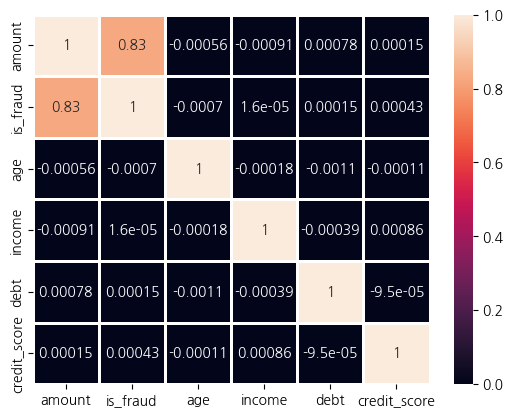

In [18]:
# 각 컬럼 간의 상관 관계 확인
# 수치형 컬럼 제거 없이 추출
data_num = data.select_dtypes(exclude='object')

# 상관관계 히트맵으로 확인
sns.heatmap(data_num.corr(), annot=True, linewidths=1)

## 피처 엔지니어링(Feature Engineering)
- amount : 종속변수(is_fraud)와 연관성이 너무 높기 때문에 과도하게 의존할 가능성이 있어 log 처리하여 컬럼 재생성
    - amount에 구간화 처리해서 모델 적용하니 정확도가 1이 나와서 log 변환으로 적용 -> 높은 연관성 차지
    - 4분위 기반 구간화로 희석 진행 -> 해당 컬럼도 높은 연관성 차지
    - `is_fraud`를 과하게 예측하게 하여 **정확도 1.0**이라는 비정상적 결과 유도
    - 위와 같은 이유로 **amount 컬럼 제거**를 결정 -> 랜덤으로 뽑는 것과 유사한 모델 결과 도출
    - 소득 대비 거래 비율(amount_per_income) 등 다양한 컬럼 재생성
- timestamp : 독립적인 값들이 많고, category 타입으로 년도/월/일/시/분/요일로 분리하여 컬럼 재생성
- location : 범주 개수와 희소성이 너무 높으므로 Top N으로 추출하여 유의한 것들을 기준으로 컬럼 재생성

### timestamp 컬럼 분할 및 확인

In [19]:
# 시간 파생변수 나누어 확인
# 일자 및 시간 확인
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 일자, 시간 요일
data['Year'] = data['timestamp'].dt.year
data['Month'] = data['timestamp'].dt.month
data['Day'] = data['timestamp'].dt.day
data['Hour'] = data['timestamp'].dt.hour
data['Min'] = data['timestamp'].dt.minute
data['Sec'] = data['timestamp'].dt.second


In [20]:
data.columns

Index(['timestamp', 'user_id', 'amount', 'location', 'device_type', 'is_fraud',
       'age', 'income', 'debt', 'credit_score', 'Year', 'Month', 'Day', 'Hour',
       'Min', 'Sec'],
      dtype='object')

In [21]:
data = data[['timestamp', 'Year', 'Month', 'Day', 'Hour','Min', 'Sec',
      'user_id', 'amount', 'location', 'device_type', 'is_fraud',
       'age', 'income', 'debt', 'credit_score']]

In [22]:
# 재생성된 컬럼들이 존재하므로 timestamp 컬럼은 제외하고 데이터셋 설정
data = data.drop('timestamp', axis=1)
data.head()

,Year,Month,Day,Hour,Min,Sec,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score
0,2023,12,15,2,48,24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,998.99,Grantfurt,Mobile,0,56,42524.98,8394.05,655
1,2023,10,30,11,8,37,3675ed98-6863-4bae-b089-6f0db2df006b,241.39,Kimberlychester,Tablet,0,52,69884.04,28434.06,395
2,2023,11,21,5,19,35,4be1043f-20ee-4ac5-a689-b25c6a1de50c,836.42,Gutierrezville,Desktop,0,58,126953.62,39121.78,496
3,2023,11,7,0,3,25,cad0b3c9-099f-479b-8043-6d5ecb4e1467,612.74,Markside,Desktop,0,19,128650.70,39652.48,612
4,2023,4,2,14,12,23,b6ebea7d-ba62-41d7-b042-3978a23fef8b,135.55,Anthonyshire,Tablet,0,59,102020.39,7439.81,302


### 타겟변수(is_fraud)와 연관성이 높은 amount 컬럼 처리


<Axes: >

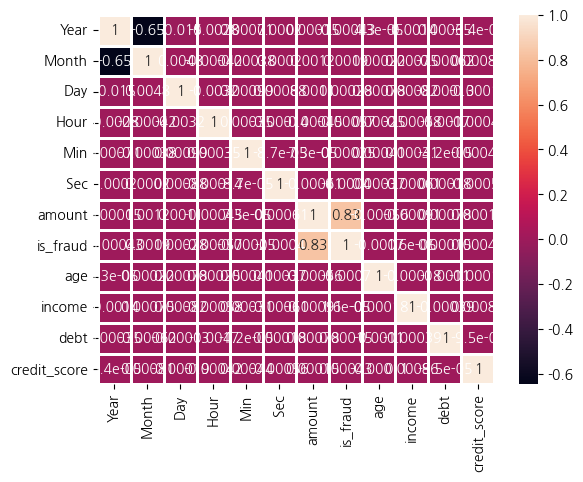

In [23]:
# 각 컬럼 간의 상관 관계 확인
# 수치형 컬럼 제거 없이 추출
data_num = data.select_dtypes(exclude='object')

# 상관관계 히트맵으로 확인
sns.heatmap(data_num.corr(), annot=True, linewidths=1)

In [24]:
# 로그 변환
amount_log = np.log1p(data['amount'])
amount_log

0         6.91
1         5.49
2         6.73
3         6.42
4         4.92
          ... 
1999995   8.15
1999996   7.76
1999997   7.67
1999998   7.81
1999999   8.39
Name: amount, Length: 2000000, dtype: float64

In [25]:
# 전체 데이터 기준 z-score
from scipy.stats import zscore

amount_zscore = zscore(data['amount'])
amount_zscore

0         -0.50
1         -1.00
2         -0.61
3         -0.76
4         -1.07
           ... 
1999995    1.15
1999996    0.39
1999997    0.26
1999998    0.47
1999999    1.75
Name: amount, Length: 2000000, dtype: float64

In [26]:
data['amount_zscore'] = amount_zscore

In [27]:
# 수입 대비 총거래금액
amount_per_income = data['amount'] / (data['income'] + 1e-3) * 100
amount_per_income

0         2.35
1         0.35
2         0.66
3         0.48
4         0.13
          ... 
1999995   2.73
1999996   2.46
1999997   1.56
1999998   1.89
1999999   5.41
Length: 2000000, dtype: float64

In [28]:
data['amount_per_income'] = amount_per_income

In [29]:
# 시간대별 평균 금액 대비 편차
hour_avg = data.groupby('Hour')['amount'].transform('mean')
hour_std = data.groupby('Hour')['amount'].transform('std') + 1e-3
amount_dev_from_user = (data['amount'] - hour_avg) / hour_std
amount_dev_from_user

0         -0.51
1         -1.00
2         -0.60
3         -0.76
4         -1.08
           ... 
1999995    1.15
1999996    0.39
1999997    0.26
1999998    0.46
1999999    1.74
Name: amount, Length: 2000000, dtype: float64

In [30]:
data['hour_avg'] = hour_avg
data['hour_std'] = hour_std
data['amount_dev_from_user'] = amount_dev_from_user

In [31]:
is_night = data['Hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)
is_night

0          1
1          0
2          1
3          1
4          0
          ..
1999995    0
1999996    1
1999997    0
1999998    0
1999999    1
Name: Hour, Length: 2000000, dtype: int64

In [32]:
data['is_night'] = is_night

In [33]:
# 야간 고액 상호작용 확인
data_night_deal = data['amount'] * is_night
data['amount_night'] = data_night_deal.apply(lambda x: 1 if x != 0 else 0)

In [34]:
# 연령 대비 거래 비율
amount_per_age = data['amount'] / (data['age'] + 1e-3)
amount_per_age

0          17.84
1           4.64
2          14.42
3          32.25
4           2.30
           ...  
1999995   173.93
1999996   106.26
1999997    42.00
1999998    54.50
1999999    89.49
Length: 2000000, dtype: float64

In [35]:
data['amount_per_age'] = amount_per_age

In [36]:
data

,Year,Month,Day,Hour,Min,Sec,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score,amount_zscore,amount_per_income,hour_avg,hour_std,amount_dev_from_user,is_night,amount_night,amount_per_age
0,2023,12,15,2,48,24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,998.99,Grantfurt,Mobile,0,56,42524.98,8394.05,655,-0.50,2.35,1763.99,1508.34,-0.51,1,1,17.84
1,2023,10,30,11,8,37,3675ed98-6863-4bae-b089-6f0db2df006b,241.39,Kimberlychester,Tablet,0,52,69884.04,28434.06,395,-1.00,0.35,1748.93,1507.41,-1.00,0,0,4.64
2,2023,11,21,5,19,35,4be1043f-20ee-4ac5-a689-b25c6a1de50c,836.42,Gutierrezville,Desktop,0,58,126953.62,39121.78,496,-0.61,0.66,1750.29,1510.69,-0.60,1,1,14.42
3,2023,11,7,0,3,25,cad0b3c9-099f-479b-8043-6d5ecb4e1467,612.74,Markside,Desktop,0,19,128650.70,39652.48,612,-0.76,0.48,1749.88,1503.19,-0.76,1,1,32.25
4,2023,4,2,14,12,23,b6ebea7d-ba62-41d7-b042-3978a23fef8b,135.55,Anthonyshire,Tablet,0,59,102020.39,7439.81,302,-1.07,0.13,1757.17,1507.68,-1.08,0,0,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2023,8,10,9,45,49,9a153a34-12d2-4eb1-a9fb-1eb2026ae0b6,3478.81,Joelview,Desktop,1,20,127482.32,6161.07,796,1.15,2.73,1755.59,1502.07,1.15,0,0,173.93
1999996,2023,10,17,0,32,20,580c1fee-1abe-40bd-b166-fc1ecaf555d4,2337.90,Taylormouth,Mobile,1,22,94866.98,21614.64,660,0.39,2.46,1749.88,1503.19,0.39,1,1,106.26
1999997,2023,5,19,13,17,44,41a22779-882a-4459-a00a-8b29521a8d38,2142.04,Coryview,Mobile,1,51,137229.33,5654.83,432,0.26,1.56,1750.02,1501.33,0.26,0,0,42.00
1999998,2023,10,22,14,7,19,1e3ca371-9b58-4c01-99a2-770c4770716f,2452.60,Escobarfurt,Desktop,1,45,129794.90,34964.36,317,0.47,1.89,1757.17,1507.68,0.46,0,0,54.50


### location 컬럼 재설정

In [37]:
# location의 데이터를 구분
loc_value = data['location'].value_counts()
print(loc_value)


location
East Michael        1713
Lake Michael        1702
New Michael         1626
Port Michael        1624
West Michael        1604
                    ... 
New Jeanetteport       1
South Bradyshire       1
Lake Kylieshire        1
Lake Tonyastad         1
New Clintonview        1
Name: count, Length: 104592, dtype: int64


In [38]:
# 갯수가 1000개 이상인 경우 유효할 수 있을 것이라고 생각
len(loc_value[loc_value >= 1000])

39

In [39]:
# location 컬럼 데이터 변환
loc_value = data['location'].value_counts()

# 조건에 맞으면 변환
data['location'] = data['location'].apply(lambda x:x if loc_value[x] >= 1000 else 'Others')
data['location'].nunique()

40

### 모델에 넣을데이터셋 선정
- 다중공선성이 높지 않도록 설정 : 종속변수와의 연관성이 너무 높으면 모델 성능이 1에 가까움

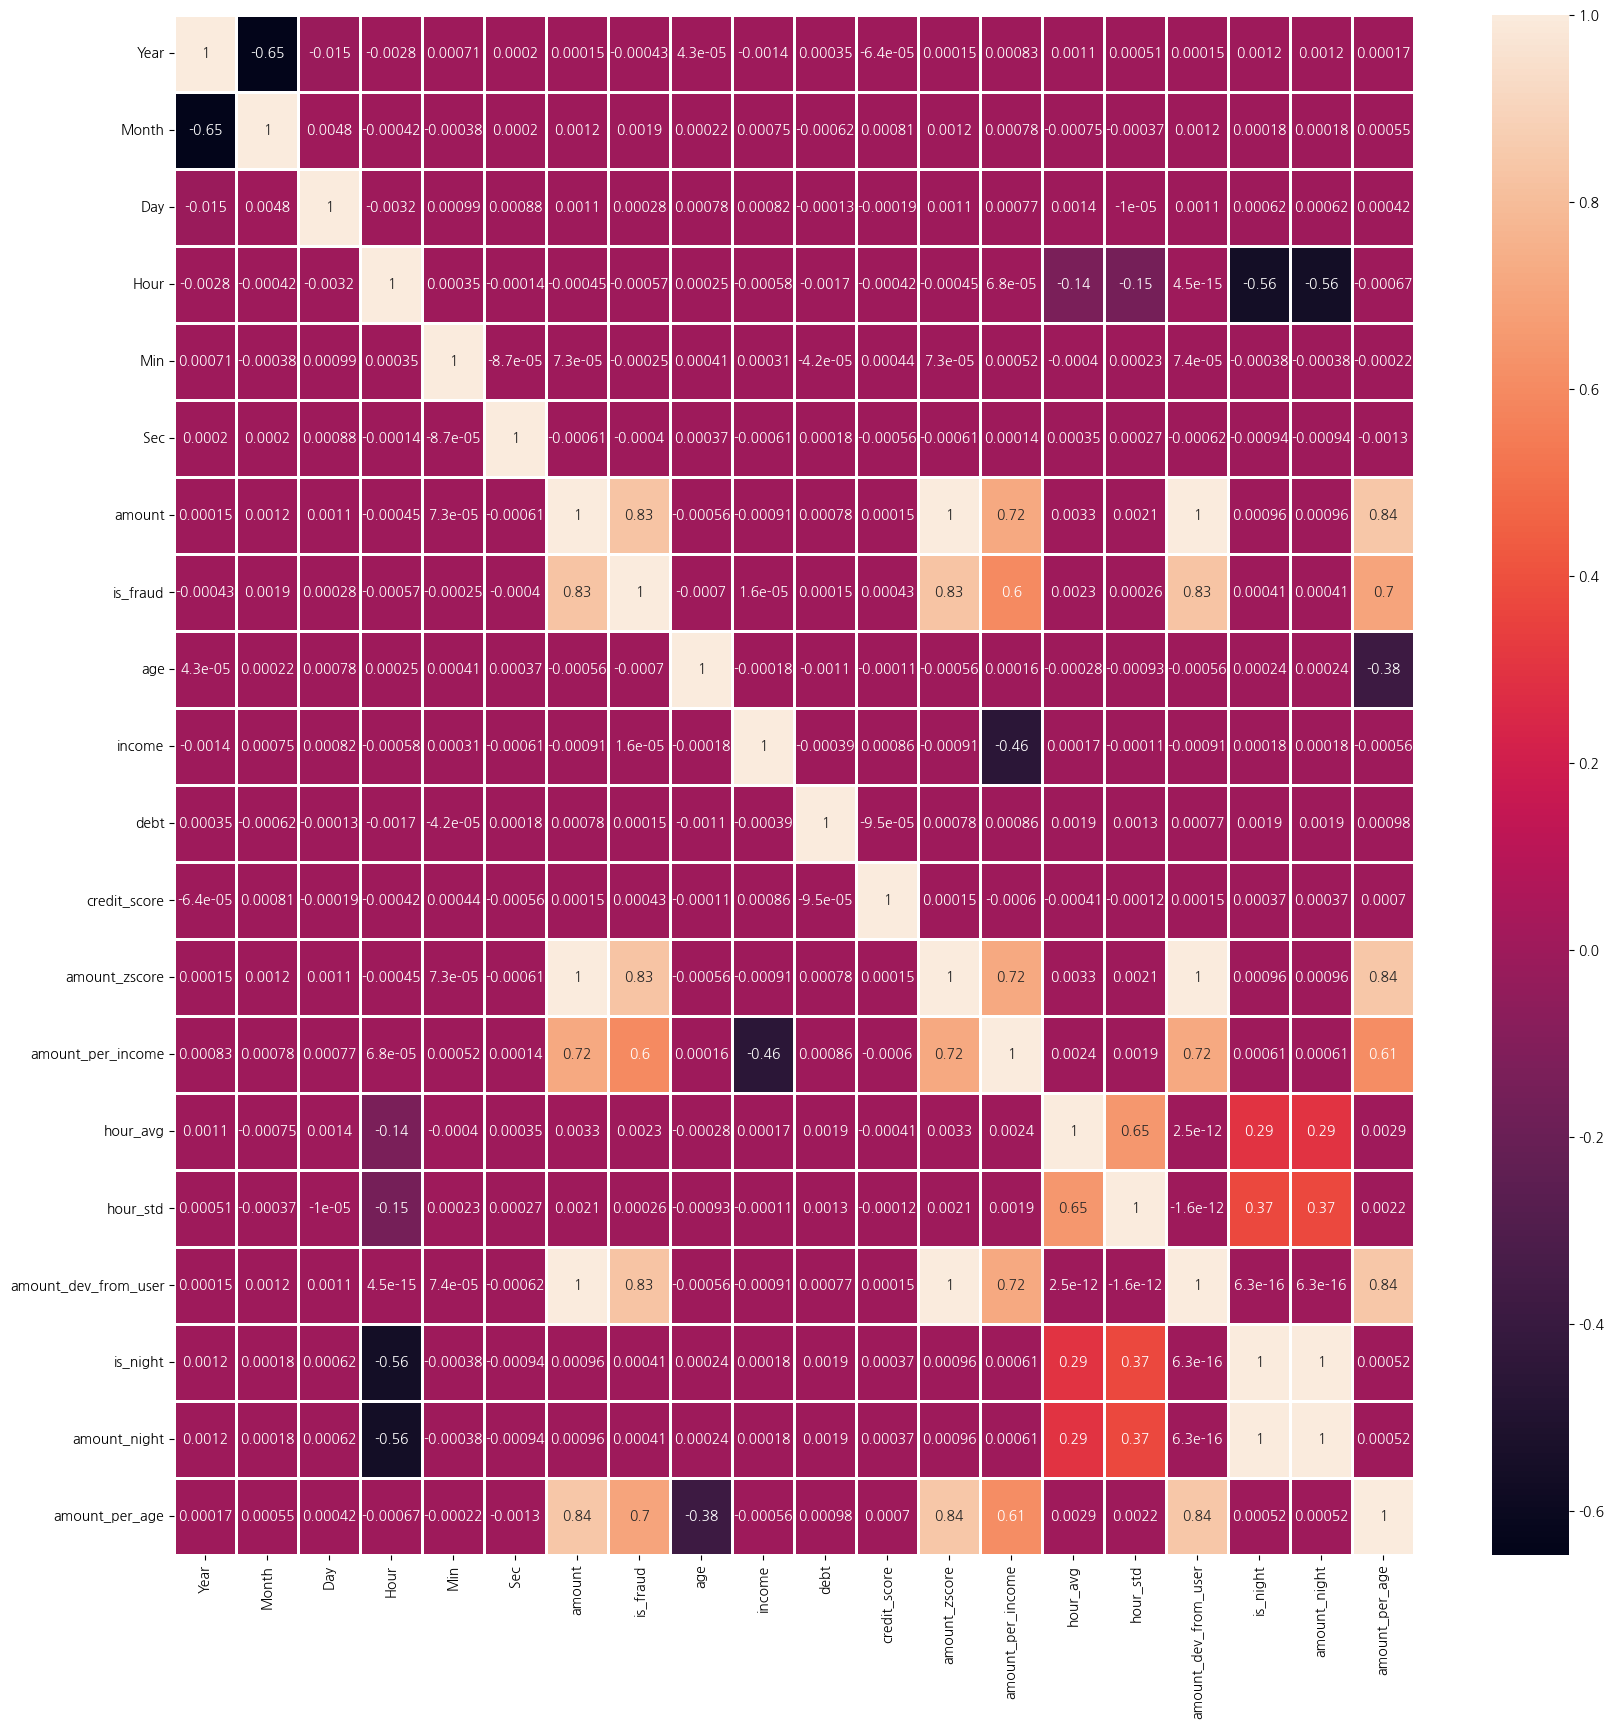

In [40]:
# 피처 엔지니얼링인 완료된 후 컬럼 간의 연관성 확인
# 시간 파생 변수이므로 0.65 정도의 약간 강한 음의 상관은 괜찮음
data_num = data.select_dtypes(exclude=['object', 'category'])

plt.figure(figsize=(20,20))
sns.heatmap(data_num.corr(), annot=True, linewidth=1)
plt.show()

In [41]:
data_num.corr()['is_fraud']

Year                   -0.00
Month                   0.00
Day                     0.00
Hour                   -0.00
Min                    -0.00
Sec                    -0.00
amount                  0.83
is_fraud                1.00
age                    -0.00
income                  0.00
debt                    0.00
credit_score            0.00
amount_zscore           0.83
amount_per_income       0.60
hour_avg                0.00
hour_std                0.00
amount_dev_from_user    0.83
is_night                0.00
amount_night            0.00
amount_per_age          0.70
Name: is_fraud, dtype: float64

#### 연관성이 높은 컬럼 제거
- amount, amount_zscore, amount_dev_from_user 제거

In [42]:
final_data = data.drop(['amount', 'amount_zscore', 'amount_dev_from_user'], axis=1)
final_data

,Year,Month,Day,Hour,Min,Sec,user_id,location,device_type,is_fraud,age,income,debt,credit_score,amount_per_income,hour_avg,hour_std,is_night,amount_night,amount_per_age
0,2023,12,15,2,48,24,3cbf0b8a-c799-4c0e-9782-89272ab8fa2b,Others,Mobile,0,56,42524.98,8394.05,655,2.35,1763.99,1508.34,1,1,17.84
1,2023,10,30,11,8,37,3675ed98-6863-4bae-b089-6f0db2df006b,Others,Tablet,0,52,69884.04,28434.06,395,0.35,1748.93,1507.41,0,0,4.64
2,2023,11,21,5,19,35,4be1043f-20ee-4ac5-a689-b25c6a1de50c,Others,Desktop,0,58,126953.62,39121.78,496,0.66,1750.29,1510.69,1,1,14.42
3,2023,11,7,0,3,25,cad0b3c9-099f-479b-8043-6d5ecb4e1467,Others,Desktop,0,19,128650.70,39652.48,612,0.48,1749.88,1503.19,1,1,32.25
4,2023,4,2,14,12,23,b6ebea7d-ba62-41d7-b042-3978a23fef8b,Others,Tablet,0,59,102020.39,7439.81,302,0.13,1757.17,1507.68,0,0,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2023,8,10,9,45,49,9a153a34-12d2-4eb1-a9fb-1eb2026ae0b6,Others,Desktop,1,20,127482.32,6161.07,796,2.73,1755.59,1502.07,0,0,173.93
1999996,2023,10,17,0,32,20,580c1fee-1abe-40bd-b166-fc1ecaf555d4,Others,Mobile,1,22,94866.98,21614.64,660,2.46,1749.88,1503.19,1,1,106.26
1999997,2023,5,19,13,17,44,41a22779-882a-4459-a00a-8b29521a8d38,Others,Mobile,1,51,137229.33,5654.83,432,1.56,1750.02,1501.33,0,0,42.00
1999998,2023,10,22,14,7,19,1e3ca371-9b58-4c01-99a2-770c4770716f,Others,Desktop,1,45,129794.90,34964.36,317,1.89,1757.17,1507.68,0,0,54.50


In [43]:
# 원핫인코딩 적용
# 200만개의 데이터 중 user_id는 200만개 존재(독립적인 값이므로 제거)
final_data = final_data.drop('user_id', axis=1)
final_data = pd.get_dummies(final_data, drop_first=True)

In [44]:
# 최종 데이터셋 확인
print(final_data.shape)
final_data

(2000000, 58)


,Year,Month,Day,Hour,Min,Sec,is_fraud,age,income,debt,credit_score,amount_per_income,hour_avg,hour_std,is_night,amount_night,amount_per_age,location_East James,location_East Jennifer,location_East John,location_East Michael,location_Lake David,location_Lake James,location_Lake Jennifer,location_Lake John,location_Lake Michael,location_Michaelmouth,location_New David,location_New James,location_New Jennifer,location_New John,location_New Michael,location_North Christopher,location_North David,location_North James,location_North John,location_North Michael,location_Others,location_Port David,location_Port James,location_Port Jennifer,location_Port John,location_Port Michael,location_Smithmouth,location_South Christopher,location_South David,location_South James,location_South Jennifer,location_South John,location_South Michael,location_West Christopher,location_West David,location_West James,location_West Jennifer,location_West John,location_West Michael,device_type_Mobile,device_type_Tablet
0,2023,12,15,2,48,24,0,56,42524.98,8394.05,655,2.35,1763.99,1508.34,1,1,17.84,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2023,10,30,11,8,37,0,52,69884.04,28434.06,395,0.35,1748.93,1507.41,0,0,4.64,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2023,11,21,5,19,35,0,58,126953.62,39121.78,496,0.66,1750.29,1510.69,1,1,14.42,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2023,11,7,0,3,25,0,19,128650.70,39652.48,612,0.48,1749.88,1503.19,1,1,32.25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2023,4,2,14,12,23,0,59,102020.39,7439.81,302,0.13,1757.17,1507.68,0,0,2.30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2023,8,10,9,45,49,1,20,127482.32,6161.07,796,2.73,1755.59,1502.07,0,0,173.93,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999996,2023,10,17,0,32,20,1,22,94866.98,21614.64,660,2.46,1749.88,1503.19,1,1,106.26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1999997,2023,5,19,13,17,44,1,51,137229.33,5654.83,432,1.56,1750.02,1501.33,0,0,42.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1999998,2023,10,22,14,7,19,1,45,129794.90,34964.36,317,1.89,1757.17,1507.68,0,0,54.50,False,False,False,False,False,False,False,False,False,False,False,False

In [45]:
# 생성된 컬럼과의 다중공선성 완화를 위한 상관 관계 확인
final_data.corr()['is_fraud']

Year                         -0.00
Month                         0.00
Day                           0.00
Hour                         -0.00
Min                          -0.00
Sec                          -0.00
is_fraud                      1.00
age                          -0.00
income                        0.00
debt                          0.00
credit_score                  0.00
amount_per_income             0.60
hour_avg                      0.00
hour_std                      0.00
is_night                      0.00
amount_night                  0.00
amount_per_age                0.70
location_East James           0.00
location_East Jennifer       -0.00
location_East John           -0.00
location_East Michael        -0.00
location_Lake David          -0.00
location_Lake James          -0.00
location_Lake Jennifer        0.00
location_Lake John            0.00
location_Lake Michael        -0.00
location_Michaelmouth         0.00
location_New David            0.00
location_New James  

In [46]:
# 최종 데이터셋 중 필요 없는 컬럼 및 단독으로는 문제 없지만 같이 사용되면 정답 학습 확률이 높은 컬럼 제거
final_data = final_data.drop(['Year', 'Month', 'Day', 'Hour', 'Min', 
                              'Sec','hour_avg', 'hour_std'
                              ,'credit_score', 'income', 'debt', 'age'], axis=1)
final_data

,is_fraud,amount_per_income,is_night,amount_night,amount_per_age,location_East James,location_East Jennifer,location_East John,location_East Michael,location_Lake David,location_Lake James,location_Lake Jennifer,location_Lake John,location_Lake Michael,location_Michaelmouth,location_New David,location_New James,location_New Jennifer,location_New John,location_New Michael,location_North Christopher,location_North David,location_North James,location_North John,location_North Michael,location_Others,location_Port David,location_Port James,location_Port Jennifer,location_Port John,location_Port Michael,location_Smithmouth,location_South Christopher,location_South David,location_South James,location_South Jennifer,location_South John,location_South Michael,location_West Christopher,location_West David,location_West James,location_West Jennifer,location_West John,location_West Michael,device_type_Mobile,device_type_Tablet
0,0,2.35,1,1,17.84,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,0.35,0,0,4.64,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,0,0.66,1,1,14.42,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0.48,1,1,32.25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0.13,0,0,2.30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1,2.73,0,0,173.93,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1999996,1,2.46,1,1,106.26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1999997,1,1.56,0,0,42.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1999998,1,1.89,0,0,54.50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## 홀드아웃(훈련데이터, 테스트 데이터로 분리)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = final_data.drop('is_fraud', axis=1)
y = final_data['is_fraud']

In [49]:
X.head(2)

,amount_per_income,is_night,amount_night,amount_per_age,location_East James,location_East Jennifer,location_East John,location_East Michael,location_Lake David,location_Lake James,location_Lake Jennifer,location_Lake John,location_Lake Michael,location_Michaelmouth,location_New David,location_New James,location_New Jennifer,location_New John,location_New Michael,location_North Christopher,location_North David,location_North James,location_North John,location_North Michael,location_Others,location_Port David,location_Port James,location_Port Jennifer,location_Port John,location_Port Michael,location_Smithmouth,location_South Christopher,location_South David,location_South James,location_South Jennifer,location_South John,location_South Michael,location_West Christopher,location_West David,location_West James,location_West Jennifer,location_West John,location_West Michael,device_type_Mobile,device_type_Tablet
0,2.35,1,1,17.84,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0.35,0,0,4.64,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [50]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1999995    1
1999996    1
1999997    1
1999998    1
1999999    1
Name: is_fraud, Length: 2000000, dtype: int64

### 홀드 아웃_Valid Sets
- 훈련용 X, 최종 테스트용X => 중간 평가용(검증 세트) 데이터 분할
- 과적합 방지 : 훈련 세트에 너무 과도하게 맞춘 모델은 새로운 데이터에 대한 예측 성능 ↓(일반화 능력 높아야 됨)

### 모델 선택(하이퍼파라미터)
- 여러 알고리즘을 비교하여, 검증 세트 또는 교차 검증 기반으로 성능이 가장 좋은 모델 선택

### 하이퍼파라미터 튜닝 
- 모델 중 가장 성능이 좋은 모델 중 더 최적화된 성능을 내기 위해 수행
- 학습률, 트리 깊이, 정규화 계수 등 모델 설정을 검증 세트 성능 기준으로 최적화하는 과정
- 검증 세트 성능 기준으로 튜닝할 경우, 최종 테스트 세트로는 한 번만 평가해야 함


In [51]:
# 검증 세트 포함하여 데이터 분리
# 전체 데이터 구성 비율 = train(60%) : valid(20%) : test(20%) 
#  stratify는 분할된 모든 세트에서 클래스 분포가 원본과 동일하게 유지하기 위함(위 데이터는 1:0 = 50%:50% 이므로 적용하지 않아도 됨)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)


In [52]:
print(len(X_train), len(X_valid), len(X_test))
print(len(y_train), len(y_valid), len(y_test))

1200000 400000 400000
1200000 400000 400000


## 데이터 분석 모델의 성능평가
- accuracy(정확도/정분류율) : 1을 1이라고 맞추고 0을 0이라고 맞춘 비율
- False Positive Rate(오분류율) : 1을 0이라고 예측하고 0을 1이라고 예측해서 잘못 예측한 것
- precision(정밀도) : 예측한 것 중에서 실제로 맞은 것, 예측 positive 중에서 실제 positive인 비율
- Recall(재현율/민감도) : 실제값을 실제값으로 잘 예측한 것, 실제 Positive 중 예측 Positive가 맞은 것
- F1-Score : precision과 recall의 조화 평균
- Specificity(특이도) : 실제 nagative 중 예측에 성공한 비율

-----
## Confusion Matrix (혼동행렬)

|                 | 예측 Positive | 예측 Negative |
|-----------------|----------------|----------------|
| **실제 Positive** | TP (True Positive) | FN (False Negative) |
| **실제 Negative** | FP (False Positive) | TN (True Negative) |

- **TP**: 실제 Positive, 예측도 Positive
- **TN**: 실제 Negative, 예측도 Negative
- **FP** (1형 오류): 실제 Negative인데 잘못 예측해서 Positive
- **FN** (2형 오류): 실제 Positive인데 잘못 예측해서 Negative

---

## 성능 지표 (Confusion Matrix 기반 수식)

- **정확도 (Accuracy)**  
  전체 중 맞춘 비율  
  $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

- **오분류율 (FPR, False Positive Rate)**  
  실제 Negative 중 Positive로 잘못 예측한 비율  
  $$ \text{FPR} = \frac{FP}{FP + TN} $$

- **정밀도 (Precision)**  
  Positive라고 예측한 것 중 실제 Positive인 비율  
  $$ \text{Precision} = \frac{TP}{TP + FP} $$

- **재현율 / 민감도 (Recall / Sensitivity)**  
  실제 Positive 중 올바르게 예측한 비율  
  $$ \text{Recall} = \frac{TP}{TP + FN} $$

- **특이도 (Specificity)**  
  실제 Negative 중 올바르게 예측한 비율  
  $$ \text{Specificity} = \frac{TN}{TN + FP} $$

- **F1 Score**  
  정밀도와 재현율의 조화 평균  
  $$ \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$
  
  

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
%%time

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)

print('DecisionTreeClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


DecisionTreeClassifier 모델 적용 결과
[[183412  16395]
 [ 16405 183788]]

정확도 = 0.918
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    199807
           1       0.92      0.92      0.92    200193

    accuracy                           0.92    400000
   macro avg       0.92      0.92      0.92    400000
weighted avg       0.92      0.92      0.92    400000

CPU times: total: 25.2 s
Wall time: 25.5 s


In [55]:
%%time

# DecisionTree 모델의 경우 : class_weight='balanced' 적용
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(X_train, y_train)
pred = dtc.predict(X_valid)

print('DecisionTreeClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


DecisionTreeClassifier 모델 적용 결과
[[183338  16469]
 [ 16372 183821]]

정확도 = 0.9178975
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    199807
           1       0.92      0.92      0.92    200193

    accuracy                           0.92    400000
   macro avg       0.92      0.92      0.92    400000
weighted avg       0.92      0.92      0.92    400000

CPU times: total: 32.1 s
Wall time: 34 s


### 배깅(Bagging)
- 원본 학습 데이터셋에서 복원추출 방법(중복 허용 랜덤 샘플링)으로 여러 데이터셋(부트스트랩)으로 생성
    - 예) 원본 학습 데이터에 10개의 데이터 존재 > 그 중 랜덤하게 중복 가능한 5개 데이터 추출 > 5개의 데이터셋 생성
- 생성된 각 데이터셋에 독립적 모델을 학습 시키고 평균(회귀) 또는 다수결(분류) 로 합침
- 효과
    - 오버피팅 완화
    - 랜덤포레스트 모델 등 활용
    - 편향(Bias) 자체를 줄일 수 없음

In [61]:
from sklearn.ensemble import BaggingClassifier

In [62]:
%%time

# n_estimators : 기본 모델(base estimator)의 개수
# n_jobs : 병렬로 사용할 CPU 코어 수를 설정

bc = BaggingClassifier(n_estimators=100, n_jobs=-1, random_state=42)
bc.fit(X_train, y_train)
pred = bc.predict(X_valid)

print('BaggingClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


BaggingClassifier 모델 적용 결과
[[186438  13369]
 [ 12713 187480]]

정확도 = 0.934795
              precision    recall  f1-score   support

           0       0.94      0.93      0.93    199807
           1       0.93      0.94      0.93    200193

    accuracy                           0.93    400000
   macro avg       0.93      0.93      0.93    400000
weighted avg       0.93      0.93      0.93    400000

CPU times: total: 8.67 s
Wall time: 6min 31s


### 부스팅(Boosting)
- 여러 약한 학습기를 순차적으로 학습
- 이전 모델이 틀린 샘플에 가중치를 높여 다음 모델이 어려운 샘플을 집중적으로 학습시킴
- 효과
    - 편향(Bias) 감소에 효과적(점진적 오류 보정을 통한 강력한 모델 생성)
    - XGBoost, LightGBM 등 활용

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
%%time

abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train, y_train)
pred = abc.predict(X_valid)

print('AdaBoostClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


AdaBoostClassifier 모델 적용 결과
[[186626  13181]
 [ 11832 188361]]

정확도 = 0.9374675
              precision    recall  f1-score   support

           0       0.94      0.93      0.94    199807
           1       0.93      0.94      0.94    200193

    accuracy                           0.94    400000
   macro avg       0.94      0.94      0.94    400000
weighted avg       0.94      0.94      0.94    400000

CPU times: total: 5min 16s
Wall time: 5min 20s


### 랜덤 배깅(RandomForest)
- 배깅 기반으로 다수의 결정 트리를 독립적으로 학습시키고 각 트리의 예측을 평균(회귀) 또는 다수결(분류) 로 합침

- 랜덤 포레스트 과정
    1. 원본 데이터에서 복원추출 방법으로 통해 랜덤 샘플을 n_estimators 개만큼 생성
    2. 트리별 학습 : 각 샘플마다 feature subset(max_feature)을 랜덤 선택 > 선택된 특성만으로 완전 성장/지정 깊이만큼 트리 생성
    3. 예측 결합 : 분류(각 트리 예측 결과 중 다수결로 최종 레이블 선택) / 회귀(트리 예측 값의 평균)
- 효과
    - 분산 감소 : 오버피팅 완화
    - 특성 중요도(feature importance) 제공 : 모델 성능에 어떤 컬럼이 기여했는지 확인 가능
    - 병렬 처리 가능 : 독립적 학습으로 분산 환경에서 학습 속도 향상

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
%%time

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_valid)

print('RandomForestClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


RandomForestClassifier 모델 적용 결과
[[186331  13476]
 [ 13012 187181]]

정확도 = 0.93378
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    199807
           1       0.93      0.94      0.93    200193

    accuracy                           0.93    400000
   macro avg       0.93      0.93      0.93    400000
weighted avg       0.93      0.93      0.93    400000

CPU times: total: 21min 24s
Wall time: 4min 6s


In [58]:
%%time

# RandomForestClassifier 모델의 경우 : class_weight='balanced' 적용 가능
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_valid)

print('RandomForestClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


RandomForestClassifier 모델 적용 결과
[[186415  13392]
 [ 12998 187195]]

정확도 = 0.934025
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    199807
           1       0.93      0.94      0.93    200193

    accuracy                           0.93    400000
   macro avg       0.93      0.93      0.93    400000
weighted avg       0.93      0.93      0.93    400000

CPU times: total: 19min 58s
Wall time: 3min 2s


# XGBoost
- https://xgboost.readthedocs.io/en/stable/install.html
- pip install xgboost
- 병렬연산이 가능해 처리 속도가 매우 빨라짐
- 따로 설치 필요

In [59]:
from xgboost import XGBClassifier

In [66]:
%%time

xgb = XGBClassifier(n_estimators=100, n_jobs=-1, random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_valid)

print('XGBClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


XGBClassifier 모델 적용 결과
[[187503  12304]
 [ 11128 189065]]

정확도 = 0.94142
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    199807
           1       0.94      0.94      0.94    200193

    accuracy                           0.94    400000
   macro avg       0.94      0.94      0.94    400000
weighted avg       0.94      0.94      0.94    400000

CPU times: total: 2min 7s
Wall time: 19.5 s


In [73]:
%%time

# scale_pos_weight=3 적용
xgb = XGBClassifier(n_estimators=100, n_jobs=-1, scale_pos_weight=3, random_state=10)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_valid)

print('XGBClassifier 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))


XGBClassifier 모델 적용 결과
[[174519  25288]
 [  3520 196673]]

정확도 = 0.92798
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    199807
           1       0.89      0.98      0.93    200193

    accuracy                           0.93    400000
   macro avg       0.93      0.93      0.93    400000
weighted avg       0.93      0.93      0.93    400000

CPU times: total: 2min 19s
Wall time: 24.4 s


# LightGBM
- https://lightgbm.readthedocs.io/en/stable/Installation-Guide.html
- xgboost보다 속도를 더 빠르게
- 비대칭 트리를 만듦

In [67]:
from lightgbm import LGBMClassifier

In [71]:
%%time
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=10,random_state=10)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_valid)

print('LightGBM 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 600202, number of negative: 599798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.187271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 1200000, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500168 -> initscore=0.000673
[LightGBM] [Info] Start training from score 0.000673
LightGBM 모델 적용 결과
[[187618  12189]
 [ 11335 188858]]

정확도 = 0.94119
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    199807
           1       0.94      0.94      0.94    200193

    accuracy                           0.94    400000
   macro avg       0.94      0.94      0.94    400000
weighted avg       0.

In [72]:
%%time

# scale_pos_weight=3 적용
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=10, scale_pos_weight=3,random_state=10)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_valid)

print('LightGBM 모델 적용 결과')
print(confusion_matrix(y_valid, pred), end='\n\n')
print(f"정확도 = {accuracy_score(y_valid, pred)}")
print(classification_report(y_valid, pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 600202, number of negative: 599798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.168421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 1200000, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500168 -> initscore=0.000673
[LightGBM] [Info] Start training from score 0.000673
LightGBM 모델 적용 결과
[[174745  25062]
 [  3712 196481]]

정확도 = 0.928065
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    199807
           1       0.89      0.98      0.93    200193

    accuracy                           0.93    400000
   macro avg       0.93      0.93      0.93    400000
weighted avg       0